In [69]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

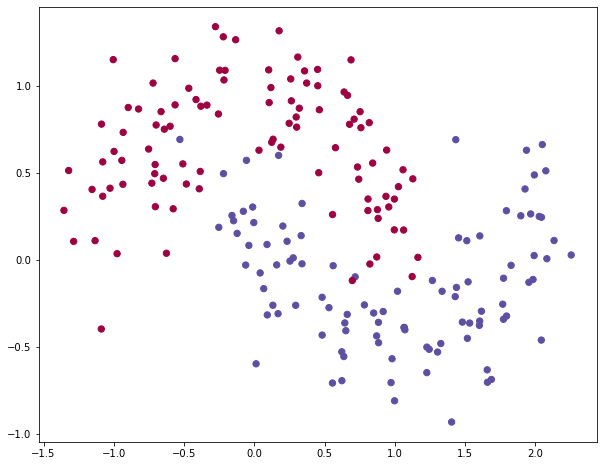

In [70]:
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [71]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)

LogisticRegressionCV()

In [72]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

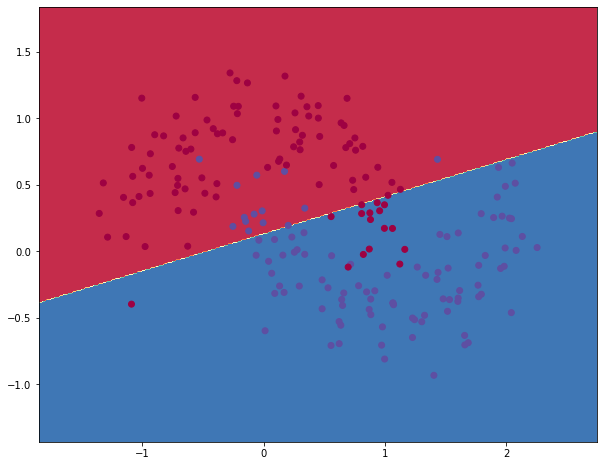

In [73]:
plot_decision_boundary(lambda x: clf.predict(x))

In [76]:
#### NN Implementation from scratch
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

## build model
def build_model(nn_hdim, num_passes=20000, print_loss=False):
    
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # This is what we return at the end
    model = {}
    
    # Gradient descent. For each batch...
    for i in range(0, num_passes):

        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
          print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
    
    return model

## predict
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    print(probs)
    return np.argmax(probs, axis=1)
##loss
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    print('probs : ', probs)
    return 1./num_examples * data_loss



probs :  [[0.51268982 0.48731018]
 [0.22130624 0.77869376]
 [0.60487665 0.39512335]
 [0.50851307 0.49148693]
 [0.25943547 0.74056453]
 [0.26472438 0.73527562]
 [0.43635095 0.56364905]
 [0.21786508 0.78213492]
 [0.45953016 0.54046984]
 [0.19765791 0.80234209]
 [0.72103798 0.27896202]
 [0.29500577 0.70499423]
 [0.25396285 0.74603715]
 [0.27587679 0.72412321]
 [0.80109752 0.19890248]
 [0.37321393 0.62678607]
 [0.6802551  0.3197449 ]
 [0.31235484 0.68764516]
 [0.72448358 0.27551642]
 [0.83111807 0.16888193]
 [0.26882242 0.73117758]
 [0.2267818  0.7732182 ]
 [0.75184263 0.24815737]
 [0.28826102 0.71173898]
 [0.82917121 0.17082879]
 [0.52303435 0.47696565]
 [0.26501817 0.73498183]
 [0.27442187 0.72557813]
 [0.50315999 0.49684001]
 [0.71908755 0.28091245]
 [0.51472928 0.48527072]
 [0.6875913  0.3124087 ]
 [0.24604901 0.75395099]
 [0.60862394 0.39137606]
 [0.60387123 0.39612877]
 [0.30149956 0.69850044]
 [0.36580403 0.63419597]
 [0.34803529 0.65196471]
 [0.75759134 0.24240866]
 [0.70692468 0.2

probs :  [[9.99821490e-01 1.78510346e-04]
 [7.38176502e-05 9.99926182e-01]
 [2.97190013e-02 9.70280999e-01]
 [9.87899089e-01 1.21009106e-02]
 [4.53070711e-04 9.99546929e-01]
 [4.76953426e-04 9.99523047e-01]
 [9.99751728e-01 2.48271883e-04]
 [1.06515192e-03 9.98934848e-01]
 [9.99688931e-01 3.11069063e-04]
 [3.90368050e-07 9.99999610e-01]
 [7.86502228e-01 2.13497772e-01]
 [1.69435523e-03 9.98305645e-01]
 [4.23798201e-04 9.99576202e-01]
 [1.39565544e-03 9.98604345e-01]
 [9.89186812e-01 1.08131883e-02]
 [9.98247366e-01 1.75263397e-03]
 [9.99961783e-01 3.82165636e-05]
 [1.66113857e-03 9.98338861e-01]
 [9.98499077e-01 1.50092289e-03]
 [9.91193885e-01 8.80611477e-03]
 [4.79056623e-04 9.99520943e-01]
 [2.00335536e-03 9.97996645e-01]
 [9.99950435e-01 4.95649899e-05]
 [3.09984576e-02 9.69001542e-01]
 [9.99997091e-01 2.90916996e-06]
 [7.58063838e-03 9.92419362e-01]
 [4.77198913e-04 9.99522801e-01]
 [5.07237553e-04 9.99492762e-01]
 [5.27670265e-03 9.94723297e-01]
 [3.51136008e-01 6.48863992e-01]
 

probs :  [[9.99846949e-01 1.53051160e-04]
 [2.80292607e-05 9.99971971e-01]
 [2.86309356e-02 9.71369064e-01]
 [9.86642642e-01 1.33573585e-02]
 [2.72415693e-04 9.99727584e-01]
 [3.00178749e-04 9.99699821e-01]
 [9.99806275e-01 1.93725180e-04]
 [8.76065303e-04 9.99123935e-01]
 [9.99718412e-01 2.81587765e-04]
 [1.01228549e-07 9.99999899e-01]
 [7.85813659e-01 2.14186341e-01]
 [1.92308223e-03 9.98076918e-01]
 [2.52683197e-04 9.99747317e-01]
 [7.30802939e-04 9.99269197e-01]
 [9.88203224e-01 1.17967763e-02]
 [9.98357013e-01 1.64298694e-03]
 [9.99973677e-01 2.63229313e-05]
 [1.89671212e-03 9.98103288e-01]
 [9.98306340e-01 1.69366004e-03]
 [9.90213461e-01 9.78653894e-03]
 [3.04104151e-04 9.99695896e-01]
 [1.62681086e-03 9.98373189e-01]
 [9.99961931e-01 3.80691440e-05]
 [1.67530476e-02 9.83246952e-01]
 [9.99997306e-01 2.69390604e-06]
 [7.49186836e-03 9.92508132e-01]
 [3.01104865e-04 9.99698895e-01]
 [3.16849968e-04 9.99683150e-01]
 [5.41288088e-03 9.94587119e-01]
 [3.00649758e-01 6.99350242e-01]
 

probs :  [[9.99860113e-01 1.39886887e-04]
 [2.28422672e-05 9.99977158e-01]
 [2.85895061e-02 9.71410494e-01]
 [9.86222866e-01 1.37771345e-02]
 [2.35774724e-04 9.99764225e-01]
 [2.60379665e-04 9.99739620e-01]
 [9.99824926e-01 1.75073687e-04]
 [8.89253891e-04 9.99110746e-01]
 [9.99740726e-01 2.59274337e-04]
 [8.24145149e-08 9.99999918e-01]
 [7.89847402e-01 2.10152598e-01]
 [2.01396751e-03 9.97986032e-01]
 [2.18351910e-04 9.99781648e-01]
 [6.44499570e-04 9.99355500e-01]
 [9.87901154e-01 1.20988459e-02]
 [9.98482799e-01 1.51720128e-03]
 [9.99976487e-01 2.35132089e-05]
 [1.99188283e-03 9.98008117e-01]
 [9.98385469e-01 1.61453109e-03]
 [9.89873588e-01 1.01264125e-02]
 [2.63839471e-04 9.99736161e-01]
 [1.64556161e-03 9.98354438e-01]
 [9.99965677e-01 3.43231434e-05]
 [1.57763961e-02 9.84223604e-01]
 [9.99997677e-01 2.32338398e-06]
 [7.66255079e-03 9.92337449e-01]
 [2.61199072e-04 9.99738801e-01]
 [2.75042750e-04 9.99724957e-01]
 [5.49080596e-03 9.94509194e-01]
 [2.99345902e-01 7.00654098e-01]
 

probs :  [[9.99864113e-01 1.35887098e-04]
 [2.12612031e-05 9.99978739e-01]
 [2.85504383e-02 9.71449562e-01]
 [9.86064590e-01 1.39354095e-02]
 [2.23452860e-04 9.99776547e-01]
 [2.46830178e-04 9.99753170e-01]
 [9.99830330e-01 1.69669608e-04]
 [8.92882706e-04 9.99107117e-01]
 [9.99747482e-01 2.52518317e-04]
 [7.71686832e-08 9.99999923e-01]
 [7.91375707e-01 2.08624293e-01]
 [2.04493252e-03 9.97955067e-01]
 [2.06823453e-04 9.99793177e-01]
 [6.16832748e-04 9.99383167e-01]
 [9.87787181e-01 1.22128191e-02]
 [9.98519152e-01 1.48084809e-03]
 [9.99977321e-01 2.26794599e-05]
 [2.02453666e-03 9.97975463e-01]
 [9.98410759e-01 1.58924138e-03]
 [9.89744984e-01 1.02550157e-02]
 [2.50099186e-04 9.99749901e-01]
 [1.65044093e-03 9.98349559e-01]
 [9.99966811e-01 3.31889442e-05]
 [1.54733056e-02 9.84526694e-01]
 [9.99997799e-01 2.20086284e-06]
 [7.71968736e-03 9.92280313e-01]
 [2.47603378e-04 9.99752397e-01]
 [2.60855787e-04 9.99739144e-01]
 [5.51244629e-03 9.94487554e-01]
 [2.98893186e-01 7.01106814e-01]
 

probs :  [[9.99865480e-01 1.34520309e-04]
 [2.07000113e-05 9.99979300e-01]
 [2.85335669e-02 9.71466433e-01]
 [9.86006050e-01 1.39939505e-02]
 [2.18911252e-04 9.99781089e-01]
 [2.41816105e-04 9.99758184e-01]
 [9.99832150e-01 1.67849959e-04]
 [8.94119986e-04 9.99105880e-01]
 [9.99749785e-01 2.50214749e-04]
 [7.53920736e-08 9.99999925e-01]
 [7.91938862e-01 2.08061138e-01]
 [2.05607536e-03 9.97943925e-01]
 [2.02576461e-04 9.99797424e-01]
 [6.06818566e-04 9.99393181e-01]
 [9.87744936e-01 1.22550642e-02]
 [9.98531390e-01 1.46860997e-03]
 [9.99977604e-01 2.23963547e-05]
 [2.03630787e-03 9.97963692e-01]
 [9.98419553e-01 1.58044720e-03]
 [9.89697342e-01 1.03026575e-02]
 [2.45010965e-04 9.99754989e-01]
 [1.65206195e-03 9.98347938e-01]
 [9.99967198e-01 3.28015399e-05]
 [1.53659273e-02 9.84634073e-01]
 [9.99997842e-01 2.15791785e-06]
 [7.74018776e-03 9.92259812e-01]
 [2.42571093e-04 9.99757429e-01]
 [2.55611364e-04 9.99744389e-01]
 [5.51970635e-03 9.94480294e-01]
 [2.98730898e-01 7.01269102e-01]
 

probs :  [[9.99865973e-01 1.34027068e-04]
 [2.04915634e-05 9.99979508e-01]
 [2.85270768e-02 9.71472923e-01]
 [9.85984311e-01 1.40156885e-02]
 [2.17198482e-04 9.99782802e-01]
 [2.39922492e-04 9.99760078e-01]
 [9.99832804e-01 1.67196087e-04]
 [8.94572852e-04 9.99105427e-01]
 [9.99750616e-01 2.49384475e-04]
 [7.47473318e-08 9.99999925e-01]
 [7.92147236e-01 2.07852764e-01]
 [2.06019155e-03 9.97939808e-01]
 [2.00975106e-04 9.99799025e-01]
 [6.03068844e-04 9.99396931e-01]
 [9.87729224e-01 1.22707756e-02]
 [9.98535790e-01 1.46421032e-03]
 [9.99977706e-01 2.22943242e-05]
 [2.04065713e-03 9.97959343e-01]
 [9.98422747e-01 1.57725329e-03]
 [9.89679637e-01 1.03203629e-02]
 [2.43088917e-04 9.99756911e-01]
 [1.65264879e-03 9.98347351e-01]
 [9.99967338e-01 3.26616862e-05]
 [1.53261451e-02 9.84673855e-01]
 [9.99997858e-01 2.14231250e-06]
 [7.74775774e-03 9.92252242e-01]
 [2.40670461e-04 9.99759330e-01]
 [2.53631512e-04 9.99746368e-01]
 [5.52234344e-03 9.94477657e-01]
 [2.98671171e-01 7.01328829e-01]
 

probs :  [[9.99866155e-01 1.33844611e-04]
 [2.04130807e-05 9.99979587e-01]
 [2.85246382e-02 9.71475362e-01]
 [9.85976187e-01 1.40238130e-02]
 [2.16549429e-04 9.99783451e-01]
 [2.39204521e-04 9.99760795e-01]
 [9.99833046e-01 1.66954464e-04]
 [8.94742314e-04 9.99105258e-01]
 [9.99750922e-01 2.49077548e-04]
 [7.45073655e-08 9.99999925e-01]
 [7.92224930e-01 2.07775070e-01]
 [2.06173059e-03 9.97938269e-01]
 [2.00368317e-04 9.99799632e-01]
 [6.01652260e-04 9.99398348e-01]
 [9.87723347e-01 1.22766534e-02]
 [9.98537416e-01 1.46258384e-03]
 [9.99977743e-01 2.22565821e-05]
 [2.04228312e-03 9.97957717e-01]
 [9.98423931e-01 1.57606897e-03]
 [9.89673017e-01 1.03269830e-02]
 [2.42360108e-04 9.99757640e-01]
 [1.65286733e-03 9.98347133e-01]
 [9.99967390e-01 3.26099318e-05]
 [1.53111942e-02 9.84688806e-01]
 [9.99997863e-01 2.13653199e-06]
 [7.75058829e-03 9.92249412e-01]
 [2.39949810e-04 9.99760050e-01]
 [2.52880960e-04 9.99747119e-01]
 [5.52332821e-03 9.94476672e-01]
 [2.98648884e-01 7.01351116e-01]
 

probs :  [[9.99866224e-01 1.33776345e-04]
 [2.03834233e-05 9.99979617e-01]
 [2.85237236e-02 9.71476276e-01]
 [9.85973136e-01 1.40268642e-02]
 [2.16303460e-04 9.99783697e-01]
 [2.38932373e-04 9.99761068e-01]
 [9.99833136e-01 1.66864078e-04]
 [8.94806161e-04 9.99105194e-01]
 [9.99751037e-01 2.48962753e-04]
 [7.44172081e-08 9.99999926e-01]
 [7.92254068e-01 2.07745932e-01]
 [2.06230930e-03 9.97937691e-01]
 [2.00138371e-04 9.99799862e-01]
 [6.01116189e-04 9.99398884e-01]
 [9.87721138e-01 1.22788620e-02]
 [9.98538025e-01 1.46197525e-03]
 [9.99977758e-01 2.22424581e-05]
 [2.04289443e-03 9.97957106e-01]
 [9.98424375e-01 1.57562545e-03]
 [9.89670530e-01 1.03294698e-02]
 [2.42083844e-04 9.99757916e-01]
 [1.65294948e-03 9.98347051e-01]
 [9.99967409e-01 3.25905629e-05]
 [1.53055512e-02 9.84694449e-01]
 [9.99997866e-01 2.13436929e-06]
 [7.75165272e-03 9.92248347e-01]
 [2.39676644e-04 9.99760323e-01]
 [2.52596482e-04 9.99747404e-01]
 [5.52369918e-03 9.94476301e-01]
 [2.98640512e-01 7.01359488e-01]
 

probs :  [[9.99866249e-01 1.33750668e-04]
 [2.03722083e-05 9.99979628e-01]
 [2.85233798e-02 9.71476620e-01]
 [9.85971986e-01 1.40280135e-02]
 [2.16210325e-04 9.99783790e-01]
 [2.38829316e-04 9.99761171e-01]
 [9.99833170e-01 1.66830081e-04]
 [8.94830267e-04 9.99105170e-01]
 [9.99751080e-01 2.48919583e-04]
 [7.43832135e-08 9.99999926e-01]
 [7.92265036e-01 2.07734964e-01]
 [2.06252749e-03 9.97937473e-01]
 [2.00051304e-04 9.99799949e-01]
 [6.00913350e-04 9.99399087e-01]
 [9.87720306e-01 1.22796942e-02]
 [9.98538254e-01 1.46174630e-03]
 [9.99977763e-01 2.22371446e-05]
 [2.04312489e-03 9.97956875e-01]
 [9.98424541e-01 1.57545857e-03]
 [9.89669593e-01 1.03304067e-02]
 [2.41979227e-04 9.99758021e-01]
 [1.65298047e-03 9.98347020e-01]
 [9.99967417e-01 3.25832763e-05]
 [1.53034188e-02 9.84696581e-01]
 [9.99997866e-01 2.13355600e-06]
 [7.75205406e-03 9.92247946e-01]
 [2.39573201e-04 9.99760427e-01]
 [2.52488759e-04 9.99747511e-01]
 [5.52383928e-03 9.94476161e-01]
 [2.98637357e-01 7.01362643e-01]
 

[[9.88094701e-01 1.19052985e-02]
 [9.88091661e-01 1.19083390e-02]
 [9.88088404e-01 1.19115960e-02]
 ...
 [2.50491715e-04 9.99749508e-01]
 [2.50464320e-04 9.99749536e-01]
 [2.50439081e-04 9.99749561e-01]]


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 3')

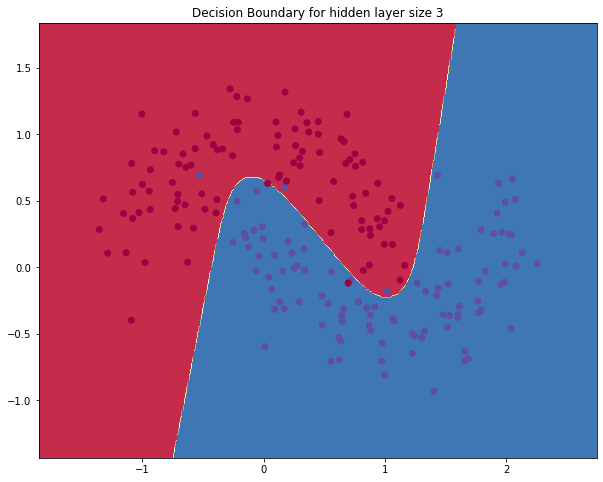

In [77]:
# Build a model with a 3-dimensional hidden layer
model = build_model(3, print_loss=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")

In [78]:
probs[range(num_examples), y]

NameError: name 'probs' is not defined